In [251]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns




In [252]:
#seabprn default parameters
sns.set(font='sans-serif')
sns.set_context('paper')

In [253]:
#Obtain all .csv files required
sep = os.path.sep
resultsdir = sep.join(["..", "experiment-results", "analysis-ready"])
filelist = [resultsdir + sep + f for f in os.listdir(resultsdir) if f[-4:]=='.csv']
print(filelist)

['..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0133.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0205.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0236.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0307.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0337.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0407.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0436.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0915.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-0947.csv', '..\\experiment-results\\analysis-ready\\experiment_results_locogp_2_iter_15-04-20-1019.csv', '..\\experiment-results\\analysis-ready\\experiment_results

In [254]:
#Create dataframe from all experiment results
criterionList = ["BRANCH", "LINE", "WEAKMUTATION", "CBRANCH"]
full_df = pd.concat([pd.read_csv(f) for f in filelist])
full_df.reset_index(drop=True, inplace=True)

#insert correctnes option
full_df["correctness"] = (full_df["success"] == True) & (full_df["validpatch"] == True)
full_df["AVG_coverage"] = sum([full_df[x + "_Coverage"] for x in criterionList]) / len(criterionList)
print(full_df["AVG_coverage"])

0      97.00
1      86.50
2      61.75
3      51.00
4      99.00
5      88.50
6      76.75
7      76.75
8      91.25
9      79.75
10     69.00
11     69.00
12     91.25
13     79.75
14     69.00
15     69.00
16     89.25
17     62.25
18     61.75
19     16.00
20     89.25
21     62.25
22     61.75
23     16.00
24     99.00
25     88.00
26     76.75
27     76.75
28     99.00
29     88.00
       ...  
365     3.25
366    98.00
367    94.75
368    52.25
369    52.25
370    97.75
371    71.75
372     3.25
373     3.25
374    59.75
375    55.50
376    52.25
377    52.25
378    86.75
379    79.25
380    79.00
381    78.50
382    96.50
383    96.00
384    90.00
385    90.00
386    99.25
387     3.25
388     3.25
389     3.25
390    97.75
391    94.50
392    87.00
393    87.00
394    96.25
Name: AVG_coverage, Length: 395, dtype: float64


In [255]:
print(full_df["Index"])

0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
       ..
365     4
366     5
367     6
368     7
369     8
370     9
371    10
372    11
373    12
374    13
375    14
376    15
377    16
378    17
379    18
380    19
381    20
382    21
383    22
384    23
385    24
386    25
387    26
388    27
389    28
390    29
391    30
392    31
393    32
394    33
Name: Index, Length: 395, dtype: int64


In [256]:
#create subset of dataframes which only contains original tests generated by evoSuite (100% sampled)
fulltest_df = full_df[full_df["Index"] % 4 == 1]
print(fulltest_df)

     Index            TARGET_CLASS     criterion  Size  Length   Fitness  \
0        1    locogp.SortInsertion        BRANCH   4.0      18  0.000000   
4        5    locogp.SortInsertion        BRANCH   3.0      13  0.000000   
8        9    locogp.SortInsertion          LINE   3.0      12  0.000000   
12      13    locogp.SortInsertion          LINE   3.0      12  0.000000   
16      17    locogp.SortInsertion  WEAKMUTATION   4.0      19  0.500000   
20      21    locogp.SortInsertion  WEAKMUTATION   4.0      19  0.500000   
24      25    locogp.SortInsertion       CBRANCH   3.0      13  0.000000   
28      29    locogp.SortInsertion       CBRANCH   3.0      13  0.000000   
32      33    locogp.SortInsertion        MANUAL   NaN       0  0.000000   
33       1        locogp.SortMerge        BRANCH   2.0      11  0.000000   
37       5        locogp.SortMerge        BRANCH   3.0      12  0.000000   
41       9        locogp.SortMerge          LINE   3.0      12  0.000000   
45      13  

In [257]:
fulltest_df["criterion"]

0            BRANCH
4            BRANCH
8              LINE
12             LINE
16     WEAKMUTATION
20     WEAKMUTATION
24          CBRANCH
28          CBRANCH
32           MANUAL
33           BRANCH
37           BRANCH
41             LINE
45             LINE
49     WEAKMUTATION
53     WEAKMUTATION
57          CBRANCH
61          CBRANCH
65           MANUAL
66           BRANCH
70           BRANCH
74             LINE
78             LINE
82     WEAKMUTATION
86     WEAKMUTATION
90          CBRANCH
94          CBRANCH
98           MANUAL
99           BRANCH
103          BRANCH
107            LINE
           ...     
287         CBRANCH
291         CBRANCH
295          MANUAL
296          BRANCH
300          BRANCH
304            LINE
308            LINE
312    WEAKMUTATION
316    WEAKMUTATION
320         CBRANCH
324         CBRANCH
328          MANUAL
329          BRANCH
333          BRANCH
337            LINE
341            LINE
345    WEAKMUTATION
349    WEAKMUTATION
353         CBRANCH


## Research Question 1: How does each coverage metric affect the correctness of generated patches?

In [258]:
totalCorrect = len(fulltest_df.loc[(fulltest_df["correctness"]==True)].index)
totalWrong = len(fulltest_df.loc[(fulltest_df["correctness"]==False)].index)
print(totalCorrect)
print(totalWrong)

37
70


In [259]:
criterionList = ["BRANCH", "LINE","WEAKMUTATION", "CBRANCH"]
correctdict = dict()
correctdict["TOTAL"] = (totalCorrect, totalWrong)
for crit in criterionList:
    correct = len(fulltest_df.loc[(fulltest_df["correctness"]==True) & (fulltest_df["criterion"] == crit)].index)
    wrong = len(fulltest_df.loc[(fulltest_df["correctness"]==False) & (fulltest_df["criterion"] == crit)].index)
    correctdict[crit] = (correct, wrong)
print(correctdict)

{'TOTAL': (37, 70), 'BRANCH': (3, 21), 'LINE': (13, 11), 'WEAKMUTATION': (6, 18), 'CBRANCH': (8, 16)}


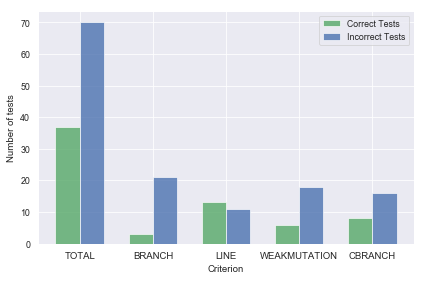

In [260]:
#Plot bar graph using above data
fig, ax = plt.subplots()
n_groups = 5
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8

correctbars = ax.bar(index, [x[0] for x in list(correctdict.values())], bar_width, alpha=opacity, \
                      color='g', label="Correct Tests")
wrongbars = ax.bar(index + bar_width, [x[1] for x in list(correctdict.values())], bar_width, alpha=opacity, \
                   color='b', label="Incorrect Tests")

plt.xticks((index + bar_width / 2), correctdict.keys(), fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)
ax.legend()

plt.ylabel("Number of tests")
plt.xlabel("Criterion")
plt.tight_layout()

fig.savefig("q1BarCorrectness.png")

-0.0003573474944026294
0.4186455842678724
-0.0006711823710959094
0.44185660459005405
-0.0005804450111825593
0.433772153811475
-0.0012661353829119973
0.47340184313494377


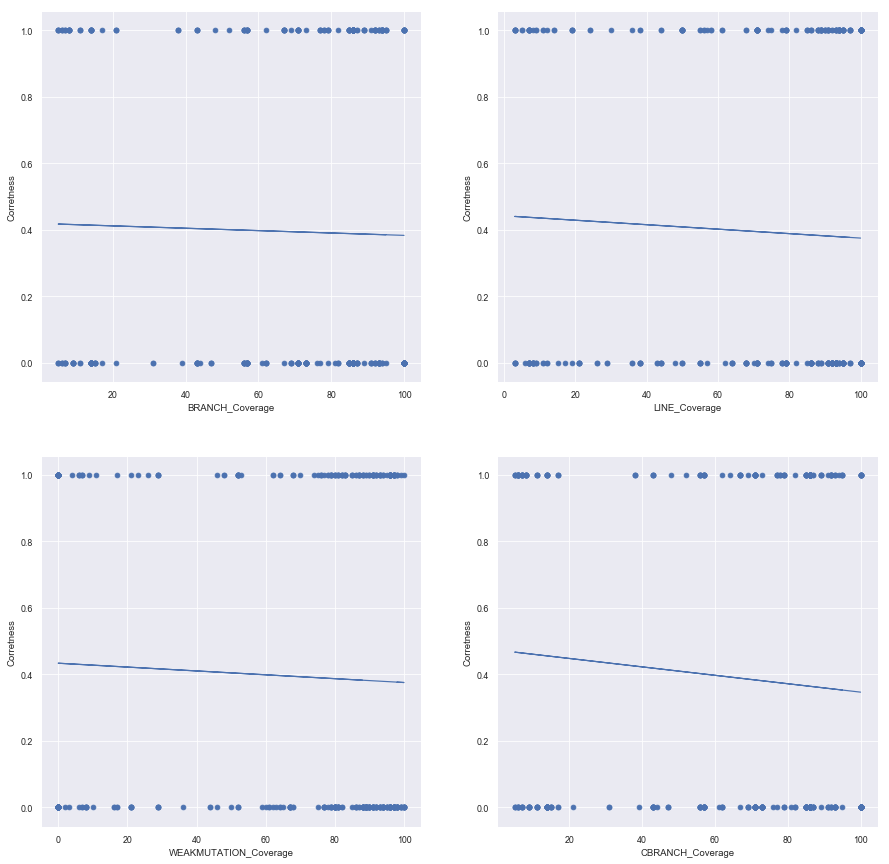

In [261]:
#Data for Scatterplots - This series of scatterplots requires correctness as BOTH having a patch and it being correct
scatterplotCorrectDict = dict()
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    x_vals = full_df[colname]
    y_vals = full_df["correctness"]
    m, c = np.polyfit(x_vals, y_vals, 1)
    print(m)
    print(c)
    ax.scatter(x_vals, y_vals)
    ax.plot(x_vals, m * x_vals + c)
    ax.set_xlabel(colname)
    ax.set_ylabel("Corretness")
fig.savefig("q1ScatterCorrectness.png")

In [262]:
#Now, we try the case where only patches which are generated are considered
valid_df = full_df.loc[(full_df['validpatch'] == True)]
valid_fulltest_df= valid_df.loc[(valid_df["Index"] % 4 == 1)]

In [263]:
totalCorrect = len(valid_fulltest_df.loc[(valid_fulltest_df["success"]==True)].index)
totalWrong = len(valid_fulltest_df.loc[(valid_fulltest_df["success"]==False)].index)
print(totalCorrect)
print(totalWrong)

37
11


In [264]:
criterionList = ["BRANCH", "LINE","WEAKMUTATION", "CBRANCH"]
correctdict = dict()
correctdict["TOTAL"] = (totalCorrect, totalWrong)
for crit in criterionList:
    correct = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==True) & (valid_fulltest_df["criterion"] == crit)].index)
    wrong = len(valid_fulltest_df.loc[(valid_fulltest_df["correctness"]==False) & (valid_fulltest_df["criterion"] == crit)].index)
    correctdict[crit] = (correct, wrong)
print(correctdict)

{'TOTAL': (37, 11), 'BRANCH': (3, 4), 'LINE': (13, 1), 'WEAKMUTATION': (6, 5), 'CBRANCH': (8, 1)}


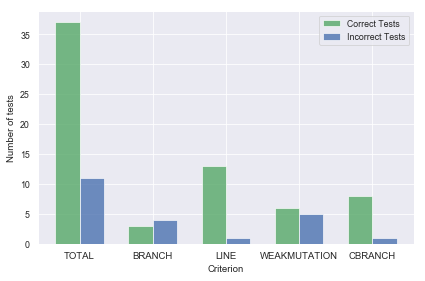

In [265]:
#Plot bar graph using above data
fig, ax = plt.subplots()
n_groups = 5
bar_spacing = 1.5
index = np.arange(n_groups * bar_spacing, step=bar_spacing)
bar_width = 0.5
opacity = 0.8

correctbars = ax.bar(index, [x[0] for x in list(correctdict.values())], bar_width, alpha=opacity, \
                      color='g', label="Correct Tests")
wrongbars = ax.bar(index + bar_width, [x[1] for x in list(correctdict.values())], bar_width, alpha=opacity, \
                   color='b', label="Incorrect Tests")

plt.xticks((index + bar_width / 2), correctdict.keys(), fontsize='medium')
#ax.set_yticks(np.arange(0, 100, 10), minor=True)
ax.grid(b=True, which='minor', color='w', linewidth=1.0)
ax.legend()

plt.ylabel("Number of tests")
plt.xlabel("Criterion")
plt.tight_layout()

fig.savefig("q1BarValidCorrectness.png")

-0.0007627758262322544
0.8589258232419051
-0.0012132267675688643
0.8928640048231685
-0.001044388516321305
0.8779232716477854
-0.0016472336640011064
0.9084556180348033


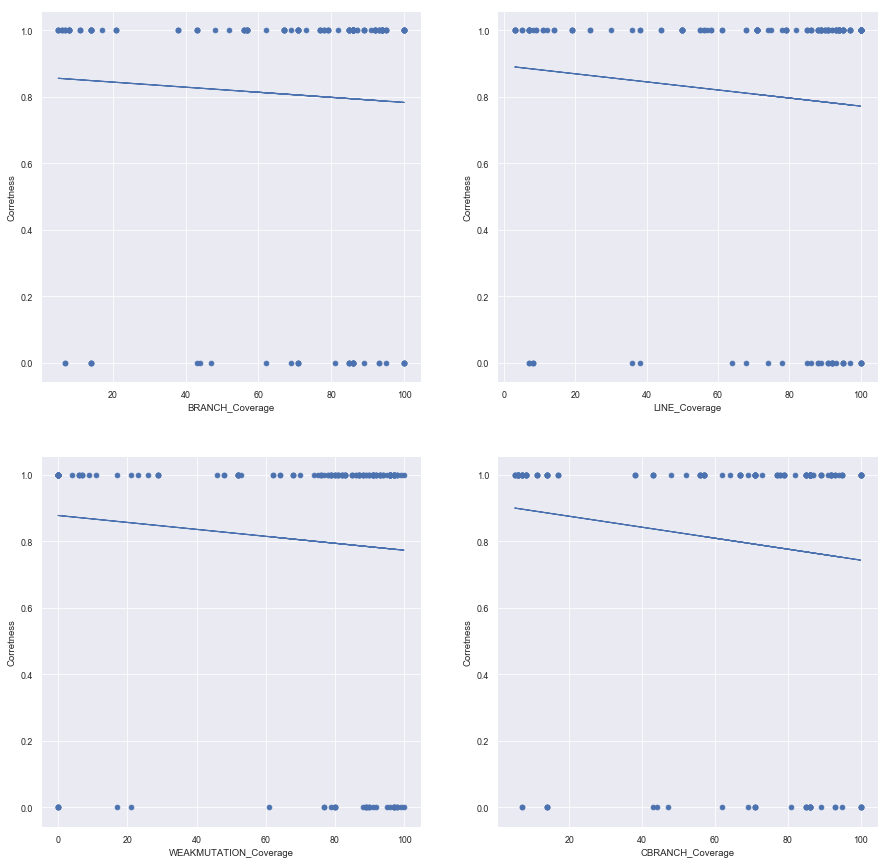

In [266]:
#Data for Scatterplots - This series of scatterplots requires correctness as BOTH having a patch and it being correct
scatterplotCorrectDict = dict()
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    x_vals = valid_df[colname]
    y_vals = valid_df["success"]
    m, c = np.polyfit(x_vals, y_vals, 1)
    print(m)
    print(c)
    ax.scatter(x_vals, y_vals)
    ax.plot(x_vals, m * x_vals + c)
    ax.set_xlabel(colname)
    ax.set_ylabel("Corretness")
fig.savefig("q1ScatterValidCorrectness.png")

Analysis of data (pending confirmation of which set of data to use

## Research Question 2: How does the coverage metric of generated tests affect the performance of the generated patches?



In [274]:
##In order to measure this, we plot a histogram for each coverage criterion and track the distribution of their speedups.
# We only consider test suites which produce patches. Considering patches which overfit is pointless.
correct_df = full_df[full_df["correctness"]==True]
correct_woutliers_df = correct_df[correct_df["speedup"] > 0]


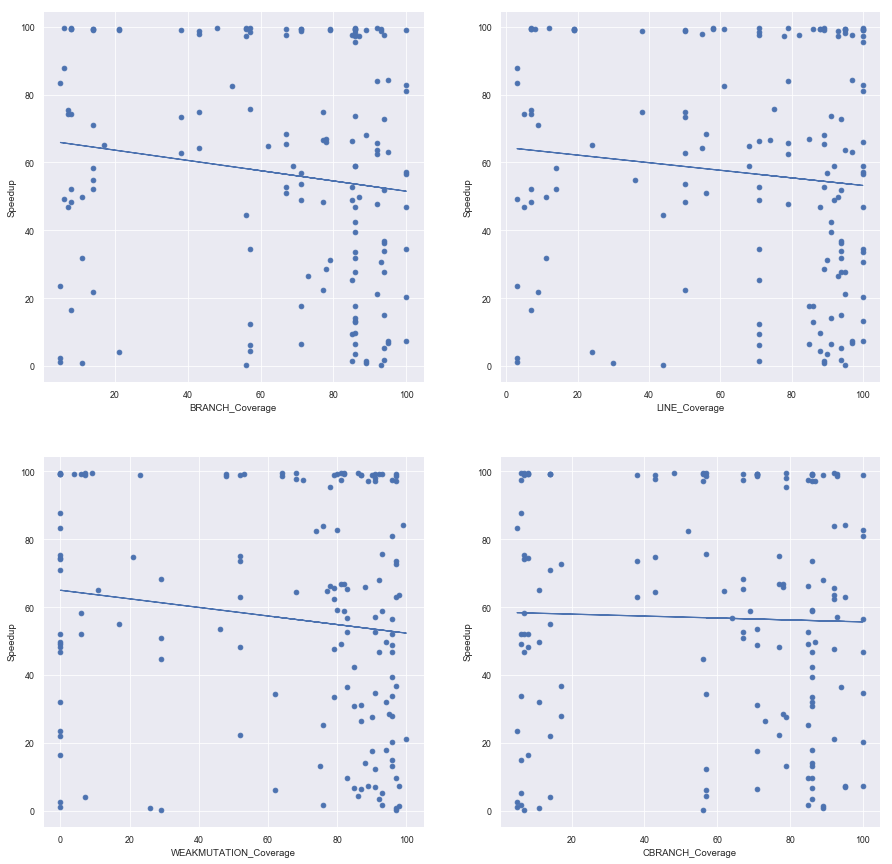

In [275]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    x_vals = correct_woutliers_df[colname]
    y_vals = correct_woutliers_df["speedup"]
    m, c = np.polyfit(x_vals, y_vals, 1)
    ax.scatter(x_vals, y_vals)
    ax.plot(x_vals, m * x_vals + c)
    ax.set_xlabel(colname)
    ax.set_ylabel("Speedup")
fig.savefig("q2ScatterCorrectSpeedup.png")

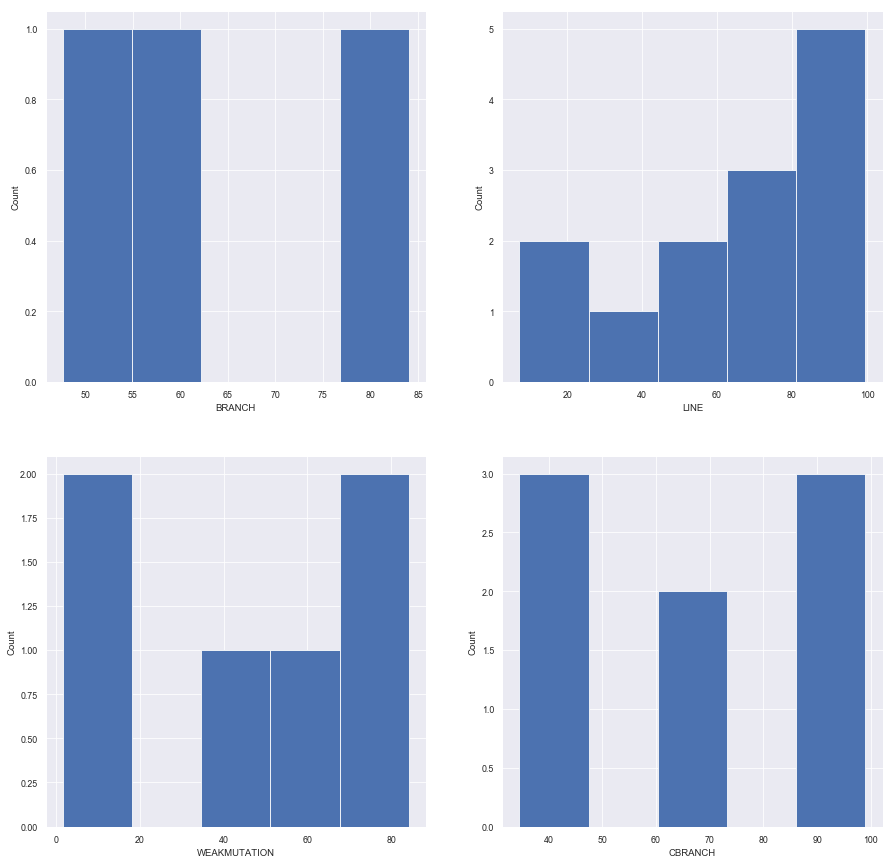

In [282]:
## WE Need more patch data from this... 
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2,2)
fig.set_figheight(15)
fig.set_figwidth(15)
axes = [ax0, ax1, ax2, ax3]
for index in range(len(criterionList)):
    #Should we only use original, non-sampled tests here? Thoughts: we want to see how evosuite coverage criterion affects. Sampled tests are not in any way representative of real life tests, thus not useful.
    criterion_spec_df = correct_woutliers_df[(correct_woutliers_df["criterion"]==criterionList[index]) & (correct_woutliers_df["Index"] % 4 ==1)]
    ax = axes[index]
    colname = criterionList[index] + "_Coverage"
    y_vals = criterion_spec_df["speedup"]
    ax.hist(y_vals, 5)
    ax.set_xlabel(criterionList[index])
    ax.set_ylabel("Count")
fig.savefig("q2HistCriterionSpeedup.png")

#### Some notes:
Scatterplot distribution above is interesting. Seems to suggest a few things:

Firstly, tests congregate around the high and lower values, there are few tests in the middle of the coverage spectrum. Given the way we vary coverage, could it be the way that evosuite generates tests - one test that has high coverage of most features and other tests to test smaller features? or something like that that the data seems to suggest

Secondly, the negative gradient seems to suggest that as coverage from the automated test suite increases, the total speedup accrued by GIN falls among "Correct" patches even. This could be due to the following : Automated tests being too restrictive? Restricting the behaviour of the program in ways that the developer did not intend. For example, a sorting program which tests a sort program may cover the entire codebase, but not actually test for required functionality (take an evosuite test which tests the sorting function on an already sorted list, or sorts a list, but compares the results using "AssertSame" which checks that they are merely the same object reference. These tests achieve high coverage but fail to actually capture the required behaviour of the program.
